In [4]:
using PyCall

In [5]:
pushfirst!(PyVector(pyimport("sys")."path"), "")
loadChildrensTransfoms = pyimport("loadChildrensTransforms")

PyObject <module 'loadChildrensTransforms' from '/media/data/hastings/ct-angledslice-align/loadChildrensTransforms.py'>

In [1]:
include("ultrasoundgeneration.jl")

longcat (generic function with 1 method)

In [6]:
t = loadChildrensTransfoms.transforms

598×4×4 Array{Float64,3}:
[:, :, 1] =
 0.058037   -0.191286  0.0235529    0.0
 0.0576307  -0.191425  0.0234147    0.0
 0.0576713  -0.191423  0.0233365    0.0
 0.0444307  -0.196313  0.000464924  0.0
 0.0192867  -0.155157  0.126758     0.0
 0.0185371  -0.154313  0.127895     0.0
 0.0186005  -0.153042  0.129404     0.0
 0.0182595  -0.151877  0.130817     0.0
 0.0583673  -0.190033  0.0315256    0.0
 0.0574831  -0.190332  0.0313446    0.0
 0.0567553  -0.190518  0.0315417    0.0
 0.0560216  -0.190613  0.0322737    0.0
 0.0561984  -0.190184  0.0344232    0.0
 ⋮                                     
 0.0516272  -0.18921   0.0452476    0.0
 0.0554079  -0.188431  0.0440087    0.0
 0.0557258  -0.188638  0.0427033    0.0
 0.0586012  -0.187895  0.0421278    0.0
 0.0595532  -0.187551  0.0423228    0.0
 0.0610696  -0.187255  0.0414662    0.0
 0.0619137  -0.187024  0.0412523    0.0
 0.0620579  -0.18719   0.040272     0.0
 0.0618896  -0.187352  0.0397742    0.0
 0.0630439  -0.187027  0.0394895    0.0
 0

In [10]:
t[1, :, :]

4×4 Array{Float64,2}:
  0.058037   -0.0843361   -0.173298   594.048 
 -0.191286   -0.00308855  -0.0625578   98.1602
  0.0235529   0.182731    -0.0810396   76.1233
  0.0         0.0          0.0          1.0   

In [11]:
using PyPlot

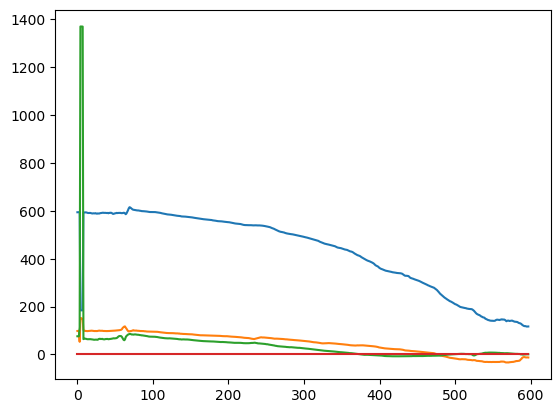

4-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f835c1f35c0>
 PyObject <matplotlib.lines.Line2D object at 0x7f835c1f3710>
 PyObject <matplotlib.lines.Line2D object at 0x7f835c1f3860>
 PyObject <matplotlib.lines.Line2D object at 0x7f835c1f39b0>

In [13]:
plot(t[:, :, 4])

In [7]:
upright

3×3 Array{Int64,2}:
  0   0  1
 -1   0  0
  0  -1  0

In [20]:
t[1, :, :]

4×4 Array{Float64,2}:
  0.058037   -0.0843361   -0.173298   594.048 
 -0.191286   -0.00308855  -0.0625578   98.1602
  0.0235529   0.182731    -0.0810396   76.1233
  0.0         0.0          0.0          1.0   

In [22]:
scale = 1 / norm(t[1, 1, 1:3])

4.968236573823897

In [23]:
ts = t * scale

598×4×4 Array{Float64,3}:
[:, :, 1] =
 0.288341   -0.950352  0.117016    0.0
 0.286323   -0.951046  0.11633     0.0
 0.286524   -0.951033  0.115941    0.0
 0.220742   -0.975331  0.00230985  0.0
 0.0958208  -0.770855  0.629765    0.0
 0.0920969  -0.766663  0.635412    0.0
 0.0924119  -0.760349  0.642909    0.0
 0.0907173  -0.754562  0.64993     0.0
 0.289983   -0.94413   0.156627    0.0
 0.28559    -0.945616  0.155727    0.0
 0.281974   -0.946539  0.156706    0.0
 0.278328   -0.947009  0.160344    0.0
 0.279207   -0.94488   0.171023    0.0
 ⋮                                    
 0.256496   -0.940041  0.224801    0.0
 0.275279   -0.936172  0.218646    0.0
 0.276859   -0.937198  0.21216     0.0
 0.291145   -0.933505  0.209301    0.0
 0.295874   -0.931798  0.21027     0.0
 0.303408   -0.930325  0.206014    0.0
 0.307602   -0.929182  0.204951    0.0
 0.308318   -0.930005  0.200081    0.0
 0.307482   -0.930811  0.197608    0.0
 0.313217   -0.929197  0.196193    0.0
 0.311038   -0.930027  0.1

In [26]:
sum(ts, dims=1)[1, :, :] ./ size(ts)[1]

4×4 Array{Float64,2}:
  0.285812   -0.27098    -0.903001  2135.9    
 -0.948928    0.0114689  -0.294384   233.61   
  0.0948676   0.943884   -0.255597   193.285  
  0.0         0.0         0.0          4.96824

In [27]:
upright

3×3 Array{Int64,2}:
  0   0  1
 -1   0  0
  0  -1  0

In [68]:
basic_b = RotXYZ(sum(hcat(map([RotXYZ(ts[i, 1:3, 1:3]) 
                    for i in 1:size(ts)[1]]) do r
    [r.theta1, r.theta2, r.theta3]
                end ...), dims=2) ./ size(ts)[1] ...)
goodcoords = cat([reshape(upright * inv(basic_b) * 
            ts[i, 1:3, 1:4], (1, 3, 4)) 
        for i in 1:size(ts)[1]]..., dims = 1)

598×3×4 Array{Float64,3}:
[:, :, 1] =
  0.0278554   -0.999204  -0.0286025
  0.030092    -0.999143  -0.0284601
  0.0299987   -0.999158  -0.0280324
  0.125614    -0.989967   0.0647196
  0.0184138   -0.817582  -0.57552  
  0.0190266   -0.81298   -0.581984 
  0.0148023   -0.807855  -0.589198 
  0.0126992   -0.802534  -0.596474 
  0.0146578   -0.997682  -0.0664695
  0.0193733   -0.997584  -0.0667338
  0.0227368   -0.997386  -0.0686137
  0.0253295   -0.997006  -0.0730715
  0.0212231   -0.996311  -0.0831711
  ⋮                                
  0.0272167   -0.989629  -0.141056 
  0.0103157   -0.991429  -0.13025  
  0.0107967   -0.992279  -0.123567 
 -0.00275163  -0.993116  -0.117114 
 -0.00786444  -0.993122  -0.116831 
 -0.0141831   -0.993746  -0.110771 
 -0.0181257   -0.993915  -0.108662 
 -0.0173193   -0.994452  -0.103765 
 -0.0156875   -0.994704  -0.101589 
 -0.0211057   -0.994891  -0.0987419
 -0.01873     -0.994928  -0.0988485
 -0.0183623   -0.995055  -0.097631 

[:, :, 2] =
  0.166138   

In [43]:
a = RotXYZ(upright)
a.theta1, a.theta2, a.theta3


(0.0, 1.5707963267948966, -1.5707963267948966)

In [44]:
det(upright)

1.0

In [49]:
ts[1, 1:3, 1:3]

3×3 Array{Float64,2}:
  0.288341  -0.419002   -0.860986
 -0.950352  -0.0153447  -0.310802
  0.117016   0.907853   -0.402624

In [64]:
goodcoords = cat([reshape(upright * inv(basic_b) * ts[i, 1:3, 1:4], (1, 3, 4)) for i in 1:size(ts)[1]]..., dims = 1)

598×3×4 Array{Float64,3}:
[:, :, 1] =
  0.0278554   -0.999204  -0.0286025
  0.030092    -0.999143  -0.0284601
  0.0299987   -0.999158  -0.0280324
  0.125614    -0.989967   0.0647196
  0.0184138   -0.817582  -0.57552  
  0.0190266   -0.81298   -0.581984 
  0.0148023   -0.807855  -0.589198 
  0.0126992   -0.802534  -0.596474 
  0.0146578   -0.997682  -0.0664695
  0.0193733   -0.997584  -0.0667338
  0.0227368   -0.997386  -0.0686137
  0.0253295   -0.997006  -0.0730715
  0.0212231   -0.996311  -0.0831711
  ⋮                                
  0.0272167   -0.989629  -0.141056 
  0.0103157   -0.991429  -0.13025  
  0.0107967   -0.992279  -0.123567 
 -0.00275163  -0.993116  -0.117114 
 -0.00786444  -0.993122  -0.116831 
 -0.0141831   -0.993746  -0.110771 
 -0.0181257   -0.993915  -0.108662 
 -0.0173193   -0.994452  -0.103765 
 -0.0156875   -0.994704  -0.101589 
 -0.0211057   -0.994891  -0.0987419
 -0.01873     -0.994928  -0.0988485
 -0.0183623   -0.995055  -0.097631 

[:, :, 2] =
  0.166138   

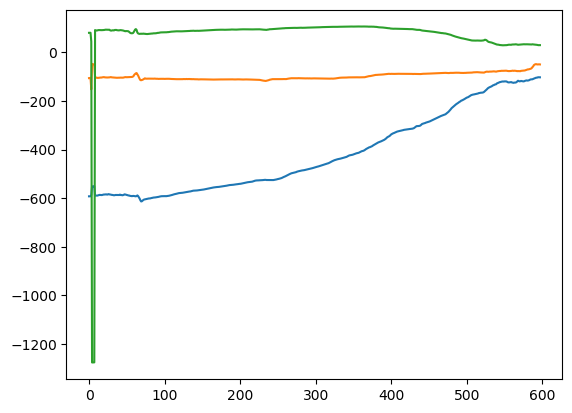

3-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5131b98390>
 PyObject <matplotlib.lines.Line2D object at 0x7f5131b984e0>
 PyObject <matplotlib.lines.Line2D object at 0x7f5131b98630>

In [67]:
using PyPlot
plot(goodcoords[:, :, 4] ./ scale)